<IPython.core.display.Javascript object>


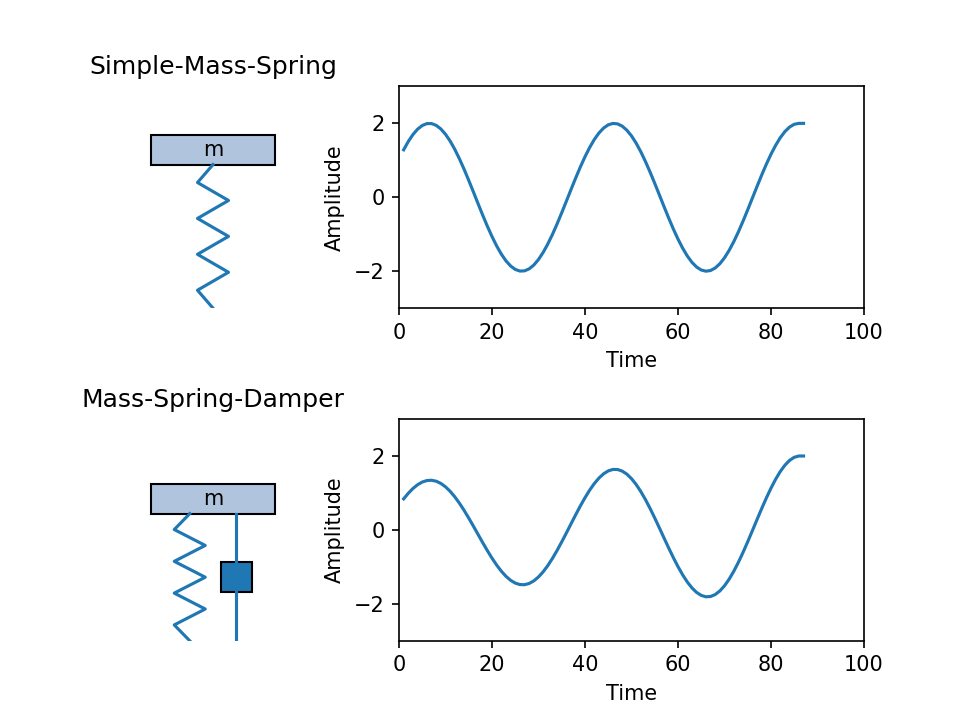

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np


# Parameter
amplitude = 2
k = 100
m = 10
c = 0.1
omega = np.sqrt(k / m)
zeta = c / (2 * np.sqrt(k * m))

sms_x = [0]
sms_y = [2]
msd_x = [0]
msd_y = [2]

fig, ax = plt.subplots()


def create_mass_spring(axs, y_next, offset, title):
    # Create mass and spring
    # Set left-bottom position of the mass
    mass_position = (-0.8, y_next - 0.4)
    mass = patches.Rectangle(mass_position, 1.6, 0.8, edgecolor='black', facecolor='lightsteelblue')

    rx, ry = mass.get_xy()
    cx = rx + mass.get_width() / 2.0
    cy = ry + mass.get_height() / 2.0

    # Create the spring
    spring_top = y_next - 0.4
    spring_len = spring_top + 3
    spring_x, spring_y = np.array([[0 - offset, -0.2 - offset, 0.2 - offset, -0.2 - offset, 0.2 - offset,
                                    -0.2 - offset, 0.2 - offset, -0.2 - offset, 0 - offset],
                                   [-3, spring_len / 8 - 3, spring_len / 4 - 3, spring_len * 3 / 8 - 3,
                                    spring_len / 2 - 3, spring_len * 5 / 8 - 3, spring_len * 3 / 4 - 3,
                                    spring_len * 7 / 8 - 3, spring_top]])
    spring = patches.mlines.Line2D(spring_x, spring_y)

    if offset != 0:
        damper = patches.Rectangle((offset - 0.2, spring_len / 2 - 3.4), 0.4, 0.8, edgecolor='black')
        damper_link = patches.mlines.Line2D([offset, offset], [-3, spring_top])
        axs.add_line(damper_link)
        axs.add_patch(damper)

    # Add the mass and spring to the diagram
    axs.add_patch(mass)
    axs.annotate("m", (cx, cy), ha='center', va='center')
    axs.add_line(spring)

    axs.set_title(title)
    axs.axis('off')
    axs.set_xlim(-1.2, 1.2)
    axs.set_ylim(-3, 3)


def create_wave(x, y, axs, y_next):
    # Update elements in wave
    y.insert(0, y_next)
    for j in range(len(x)):
        x[j] += 1
    x.insert(0, 1)
    if len(x) > 100:
        del(x[-1])
        del(y[-1])

    axs.set_xlabel("Time")
    axs.set_ylabel("Amplitude")
    axs.set_xlim(0, 100)
    axs.set_ylim(-3, 3)
    axs.plot(x, y)


def animate(i):
    # Simple-Mass-Spring
    # Calculate next y position
    y_sms_next = amplitude * np.cos(omega * i / 20)
    y_msd_next = amplitude * np.exp(-zeta * omega * i) * np.cos(np.sqrt(1 - zeta ** 2) * omega * i / 20)

    # Clear and update the system
    fig.clear()
    axs_smp_1 = fig.add_subplot(2, 3, 1)
    axs_msd_1 = fig.add_subplot(2, 3, 4)

    # Get the center position of the mass
    create_mass_spring(axs_smp_1, y_sms_next, 0, "Simple-Mass-Spring")
    create_mass_spring(axs_msd_1, y_msd_next, 0.3, "Mass-Spring-Damper")

    # Create wave
    axs_smp_2 = fig.add_subplot(2, 3, (2, 3))
    axs_msd_2 = fig.add_subplot(2, 3, (5, 6))
    create_wave(sms_x, sms_y, axs_smp_2, y_sms_next)
    create_wave(msd_x, msd_y, axs_msd_2, y_msd_next)


ani = animation.FuncAnimation(fig, animate, interval=30)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()
